In [285]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install scikit-learn
!pip3 install keras
!pip3 install datetime
!pip3 install seaborn
!pip3 install tensorflow


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score, accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import backend as k
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout
from datetime import datetime

In [2]:
def AbsolVal(data):
    if data<0:
        return -data
    return data

In [33]:
#pandas의 read_csv 함수를 사용하여 데이터를 불러옴
moldset_labeled = pd.read_csv(r'./molding9.csv', low_memory=False)

moldset_labeled.drop(columns={'Mold_Temperature_1',
                              'Mold_Temperature_2',
                              'Mold_Temperature_3',
                              'Mold_Temperature_4',
                              'Mold_Temperature_5',
                              'Mold_Temperature_6',
                              'Mold_Temperature_7',
                              'Mold_Temperature_8',
                              'Mold_Temperature_9',
                              'Mold_Temperature_10',
                              'Mold_Temperature_11',
                              'Mold_Temperature_12',
                              'Hopper_Temperature',
                              'Clamp_open_time',
                              'Cavity',
                              'NGmark'}
                     ,inplace=True)
moldset_labeled

,idx,Machine_Name,Additional_Info_1,Additional_Info_2,TimeStamp,Shot_Number,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,...,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7
0,20.0,6i,09520 9000R,,2021-12-14 17:39:39,102889.0,7.89,3.89,23.820000,66.699997,...,106.000000,24.799999,22.400000,197.600006,200.800003,225.199997,215.800003,208.000000,190.000000,41.200001
1,21.0,6i,09520 9000R,,2021-12-14 17:40:27,102890.0,7.89,3.89,23.809999,66.699997,...,106.400002,24.799999,22.299999,198.399994,201.000000,225.199997,216.100006,208.199997,190.199997,41.599998
2,22.0,6i,09520 9000R,,2021-12-14 17:41:34,102891.0,7.89,3.89,23.770000,66.699997,...,106.800003,24.900000,22.299999,198.000000,200.600006,225.100006,216.100006,208.399994,190.199997,41.400002
3,23.0,6i,09520 9000R,,2021-12-14 17:42:40,102892.0,7.89,3.89,23.760000,66.699997,...,106.599998,24.799999,22.400000,197.399994,199.500000,225.300003,216.100006,208.199997,190.199997,40.599998
4,24.0,6i,09520 9000R,,2021-12-14 17:43:47,102893.0,7.87,3.87,23.780001,66.699997,...,107.000000,24.799999,22.400000,198.699997,198.899994,225.300003,216.000000,208.100006,189.899994,40.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73554,73555.0,6i,09520 9000R,,2022-03-24 14:00:56,176608.0,9.59,3.59,26.400000,66.599998,...,108.800003,17.600000,16.500000,198.000000,194.800003,220.000000,215.000000,208.300003,195.199997,40.400002
73555,73556.0,6i,09520 9000R,,2022-03-24 14:02:03,176609.0,9.60,3.60,26.389999,66.599998,...,108.500000,17.600000,16.500000,198.100006,194.000000,220.000000,214.899994,208.000000,194.899994,39.799999
73556,73557.0,6i,09520 9000R,,2022-03-24 14:03:09,176610.0,9.58,3.58,26.340000,66.599998,...,108.800003,17.600000,16.500000,198.000000,193.699997,219.800003,214.899994,208.000000,194.899994,39.500000
73557,73558.0,6i,09520 9000R,,2022-03-24 14:04:16,176611.0,9.60,3.60,26.370001,66.599998,...,108.599998,17.799999,16.500000,198.100006,194.000000,219.899994,215.000000,208.000000,194.899994,39.099998


In [34]:
#pandas dataframe의 value_counts 함수를 사용
moldset_labeled['Machine_Name'].value_counts()  #결과는 아래에서 확인 가능하다.

6i    73540
7I       19
Name: Machine_Name, dtype: int64

In [35]:
#분석에 사용되는 제품 코드
# parts = ['86141AA000', '86131AA000', '86141T1000', '86131T1000']
moldset_labeled=moldset_labeled[moldset_labeled.Additional_Info_1!='today1']
moldset_labeled['Additional_Info_1'].value_counts()

  #결과는 아래에서 확인 가능하다.

09520 9000R                         65669
GURAD REF UPP   DA63                 6946
ROSSO GR.MID.DA63-68                  925
Name: Additional_Info_1, dtype: int64

In [36]:
#dataframe 이름을 사용
moldset_labeled_9000R=moldset_labeled[moldset_labeled.Additional_Info_1=='09520 9000R']
moldset_labeled_GURAD =moldset_labeled[moldset_labeled.Additional_Info_1.str.contains('GURAD')]
moldset_labeled_ROSSO =moldset_labeled[moldset_labeled.Additional_Info_1.str.contains('ROSSO')]


moldset_labeled_GURAD.tail() #결과는 아래에서 확인 가능하다.

,idx,Machine_Name,Additional_Info_1,Additional_Info_2,TimeStamp,Shot_Number,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,...,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7
27220,27221.0,6i,GURAD REF UPP DA63,,2022-01-22 07:28:57,130223.0,9.35,3.35,23.639999,73.599998,...,63.200001,10.8,9.8,183.399994,189.000000,217.000000,210.100006,203.300003,180.000000,39.099998
27221,27222.0,6i,GURAD REF UPP DA63,,2022-01-22 07:30:11,130224.0,9.35,3.35,23.639999,73.599998,...,63.299999,10.9,9.9,183.199997,189.000000,217.000000,210.000000,203.199997,180.100006,39.200001
27222,27223.0,6i,GURAD REF UPP DA63,,2022-01-22 07:31:25,130225.0,9.35,3.35,23.760000,73.599998,...,63.200001,10.8,9.8,183.600006,190.100006,217.000000,210.000000,202.800003,180.100006,39.400002
27223,27224.0,6i,GURAD REF UPP DA63,,2022-01-22 07:32:38,130226.0,9.35,3.35,23.660000,73.599998,...,63.099998,11.0,9.9,183.699997,190.899994,217.199997,210.100006,203.000000,180.100006,39.599998
27224,27225.0,6i,GURAD REF UPP DA63,,2022-01-22 07:33:56,130227.0,9.35,3.35,23.559999,73.599998,...,63.299999,10.8,9.9,183.899994,191.199997,217.199997,210.100006,203.100006,179.899994,39.700001


101


,idx,Shot_Number,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,...,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2021-12-14,9832.666667,9832.666667,0.000160,0.000160,2.644685e-02,2.092588e-03,0.000040,0.000795,0.000256,0.002607,...,0.212090,0.007650,0.000311,0.188827,0.334404,0.057493,0.048536,0.017853,0.015651,1.010427
2021-12-15,133879.666667,134287.987924,0.031309,0.028238,1.356316e-01,3.209251e-02,0.000047,0.226592,0.265607,0.002887,...,16.750176,0.008493,0.000750,0.203247,0.313582,0.914286,0.408165,0.023588,0.021081,0.991842
2021-12-16,137495.000000,137991.270408,0.008004,0.008004,8.979176e+06,8.979142e+06,0.000038,0.001345,0.000023,0.003030,...,0.261154,0.008482,0.000565,0.210388,0.371979,0.359680,0.306501,0.022473,0.023188,0.996890
2021-12-17,131147.500000,131512.328220,0.001108,0.001108,6.634273e-02,3.796738e-02,0.002640,0.001373,0.000016,0.002891,...,0.221521,0.008819,0.001624,0.234705,0.367530,0.573037,0.214672,0.023380,0.023718,1.039649
2021-12-18,13906.000000,14108.106566,0.025634,0.025634,6.059036e-02,2.692760e-02,0.000033,0.300573,0.316080,0.002690,...,5.615574,0.007983,0.002419,0.227098,0.383478,0.173019,0.097242,0.026235,0.024787,1.050403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-19,13167.166667,13167.166667,0.003818,0.003818,1.488888e-02,6.779713e-03,0.000034,0.002620,0.000100,0.001851,...,0.407811,0.005613,0.001196,0.018689,0.761950,0.205431,0.020960,0.018168,0.015576,0.989184
2022-03-21,65047.666667,65047.666667,0.002688,0.002688,3.295028e+00,3.209381e+00,0.000193,0.035287,0.000045,0.003090,...,2.355346,0.030740,0.029786,0.021253,0.691422,0.876805,0.059492,0.038857,0.029681,10.685199
2022-03-22,140292.166667,140292.166667,0.000288,0.000288,3.570845e-02,1.686771e-03,0.000063,0.005573,0.000152,0.001661,...,0.309659,0.007031,0.002479,0.018181,0.728032,0.041111,0.022023,0.021002,0.024667,0.942480


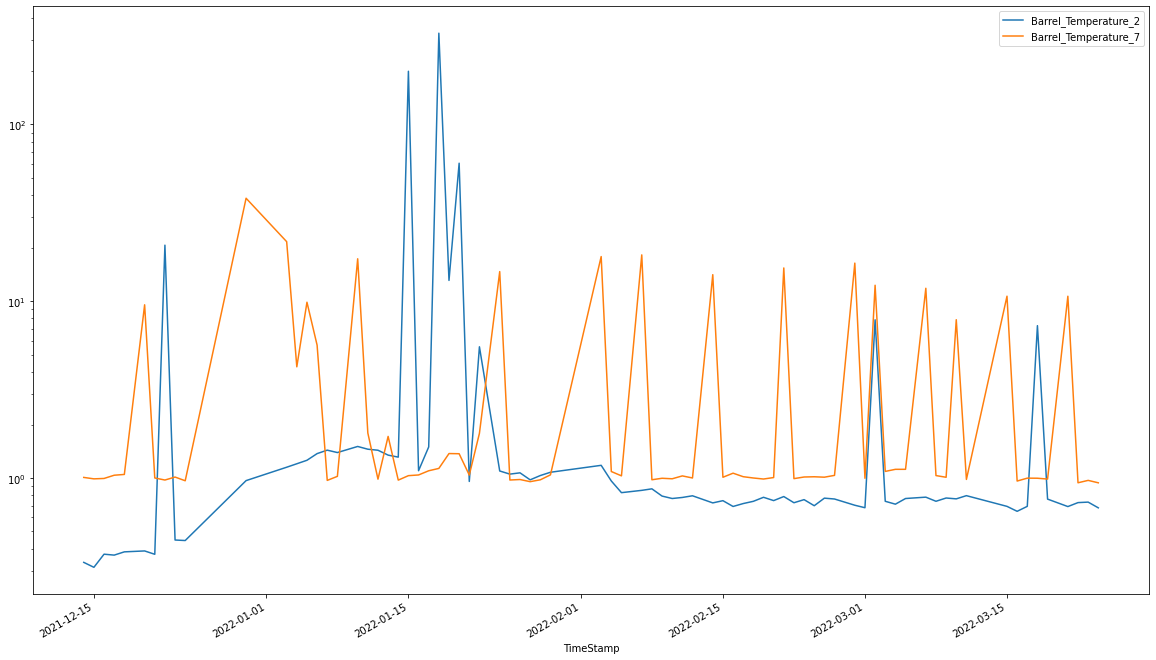

In [37]:
df=moldset_labeled
df.index=pd.to_datetime(df['TimeStamp'], format = "%Y.%m.%d")

df=moldset_labeled.groupby(pd.Grouper(freq='D')).var()
print(df.index.size)
# yset=['Barrel_Temperature_1','Barrel_Temperature_2','Barrel_Temperature_3','Barrel_Temperature_4','Barrel_Temperature_5','Barrel_Temperature_6','Barrel_Temperature_7']
yset=['Barrel_Temperature_2','Barrel_Temperature_7']
df=df.dropna(subset=yset)
df.plot(y=yset,kind='line',figsize=(20,12),logy=True)

df


<ipython-input-38-d3c52c5ca8e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ret_df['TimeStamp']=pd.to_datetime(ret_df['TimeStamp'], format = "%Y.%m.%d")


<AxesSubplot:>

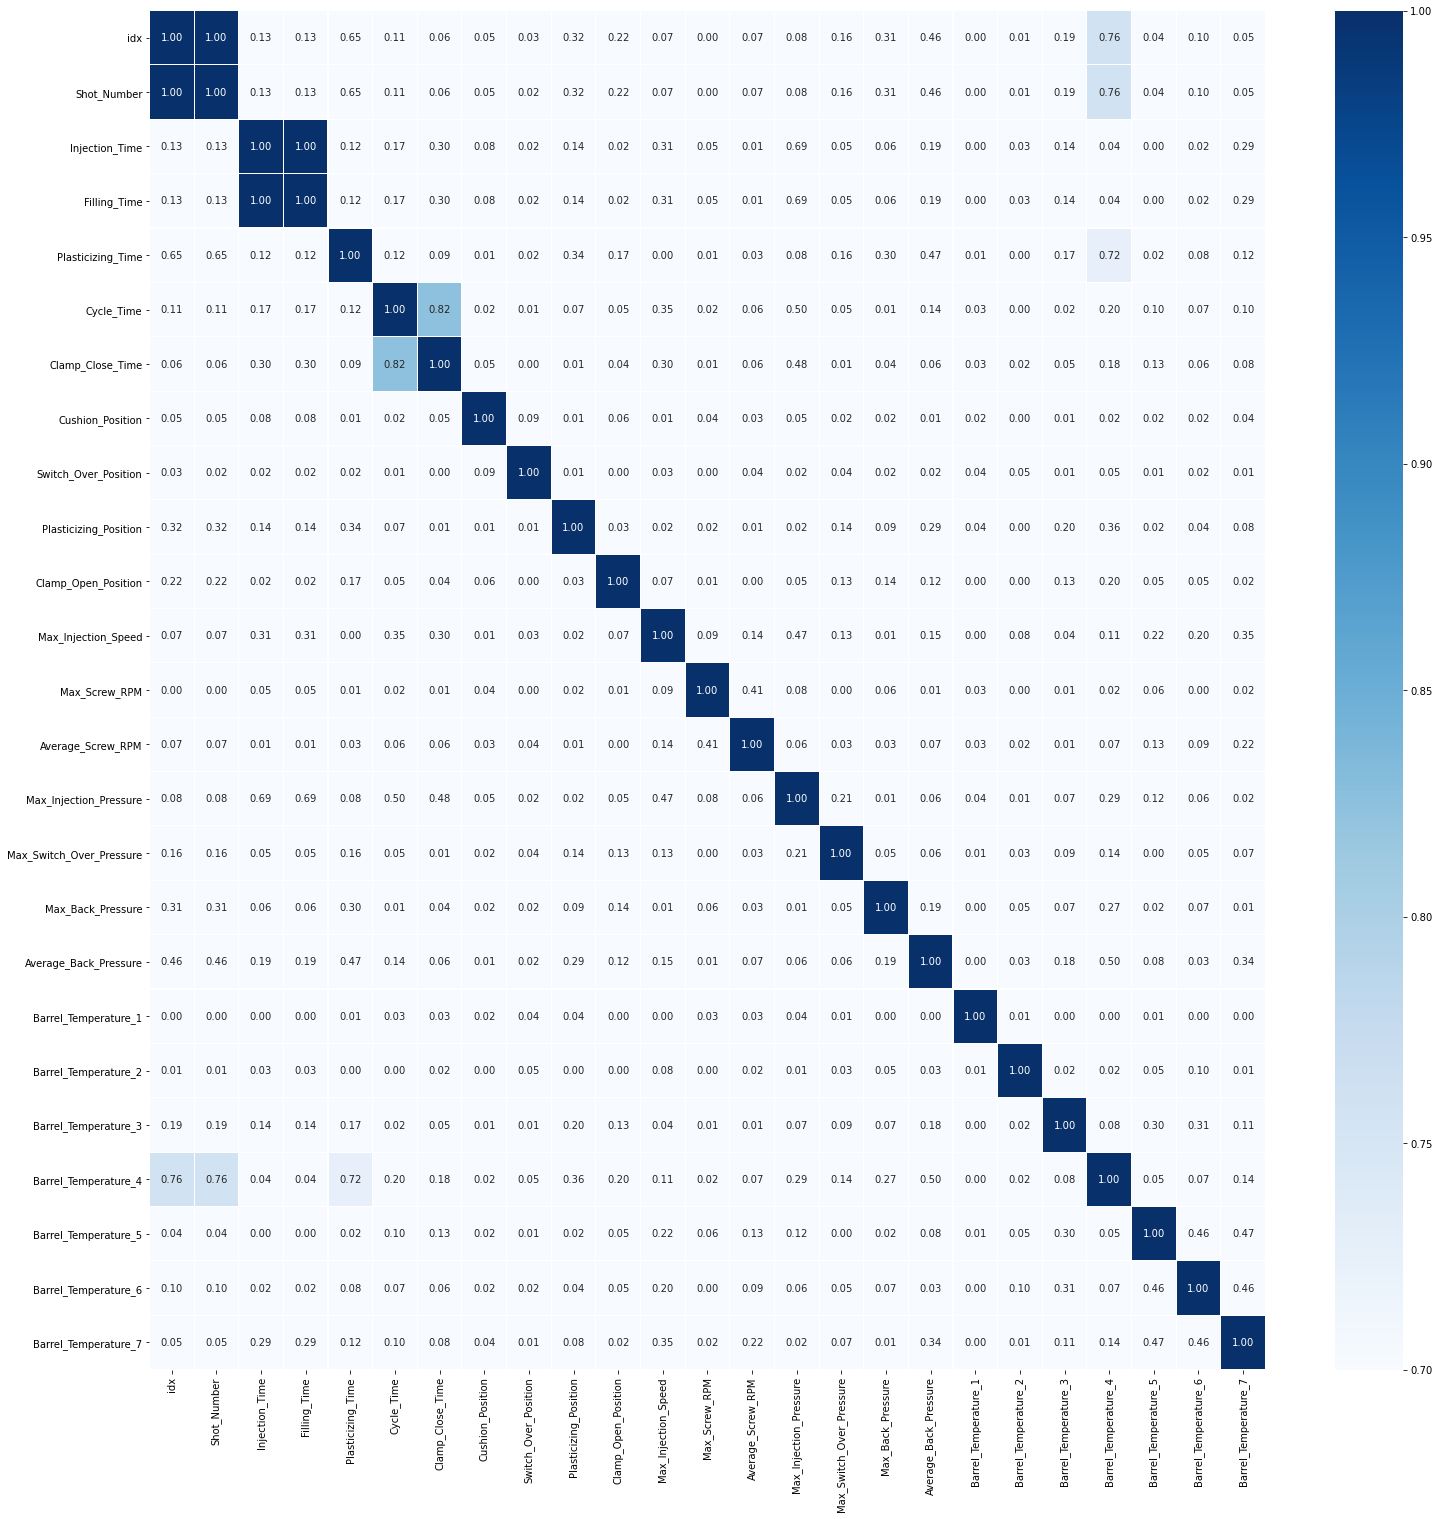

In [38]:
def DFDate(dataframe,products_name, date):
    ret_df=dataframe[dataframe.Additional_Info_1.str.contains(products_name)]
    date_date=datetime.strptime(date, "%Y.%m.%d")
    ret_df['TimeStamp']=pd.to_datetime(ret_df['TimeStamp'], format = "%Y.%m.%d")
    ret_df=ret_df[ret_df['TimeStamp'].dt.year==date_date.year]
    ret_df=ret_df[ret_df['TimeStamp'].dt.month==date_date.month]
    ret_df=ret_df[ret_df['TimeStamp'].dt.day==date_date.day]
    return ret_df


    
corr_14date=DFDate(moldset_labeled,'9000R',"2021.12.17").corr().abs()
plt.subplots(figsize=(25,25))
sns.heatmap(data = corr_14date,vmin=0.7, linewidths=0.1, annot=True, fmt= '.2f',cmap='Blues')
# corr_mol9=moldset_labeled.corr()

In [39]:
moldset_labeled_9000R.describe()

,idx,Shot_Number,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,...,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7
count,65669.000000,65669.000000,65669.000000,65669.000000,65669.000000,65669.000000,65669.000000,65669.000000,65669.000000,65669.000000,...,65669.000000,65669.000000,65669.000000,65669.000000,65669.000000,65669.000000,65669.000000,65669.000000,65669.000000,65669.000000
mean,38407.532321,141401.640028,10.260191,3.710972,34.341499,90.804259,5.095942,24.299031,25.497675,162.152690,...,95.170779,19.105452,17.763310,195.704802,205.526402,230.696994,224.366086,210.042538,195.372840,39.416923
std,21900.299375,21963.072706,419.001805,0.389284,1026.304622,1567.622198,0.038370,1.959067,1.697410,2.563350,...,10.657883,2.310707,2.020831,4.049442,6.007204,5.827239,5.571225,2.462901,4.301391,1.968688
min,20.000000,102889.000000,3.570000,3.050000,14.780000,58.900002,1.680000,4.200000,19.900000,159.000000,...,62.599998,11.000000,9.500000,184.000000,190.699997,217.500000,210.100006,203.100006,179.100006,16.799999
25%,16437.000000,119347.000000,7.920000,3.540000,24.440001,66.599998,5.070000,22.799999,25.900000,159.399994,...,85.099998,17.799999,16.600000,197.500000,199.199997,224.600006,219.899994,208.000000,190.100006,38.700001
50%,40725.000000,143749.000000,8.630000,3.620000,24.990000,67.300003,5.090000,25.100000,26.000000,162.000000,...,98.199997,18.200001,16.900000,197.699997,209.000000,234.899994,225.000000,208.100006,195.000000,39.700001
75%,57142.000000,160190.000000,9.530000,3.960000,25.780001,69.199997,5.110000,25.700001,26.000000,164.199997,...,105.199997,18.600000,17.299999,198.000000,210.399994,235.100006,230.000000,213.000000,200.000000,40.500000
max,73559.000000,176612.000000,107381.617188,8.830000,107400.257812,107446.000000,5.390000,28.900000,29.000000,190.699997,...,109.599998,25.799999,23.200001,200.000000,218.600006,239.199997,230.699997,214.300003,202.899994,42.000000


68.0     3960
57.0      848
69.0      574
56.0      434
74.0      212
72.0      168
70.0      165
73.0      159
71.0      148
75.0      119
58.0       64
89.0       22
76.0       22
90.0       13
96.0        6
59.0        5
77.0        4
91.0        4
95.0        3
105.0       3
94.0        2
60.0        2
104.0       2
103.0       2
80.0        1
102.0       1
98.0        1
78.0        1
101.0       1
Name: Max_Screw_RPM, dtype: int64
68.0
68.0    6946
Name: Max_Screw_RPM, dtype: int64


<AxesSubplot:>

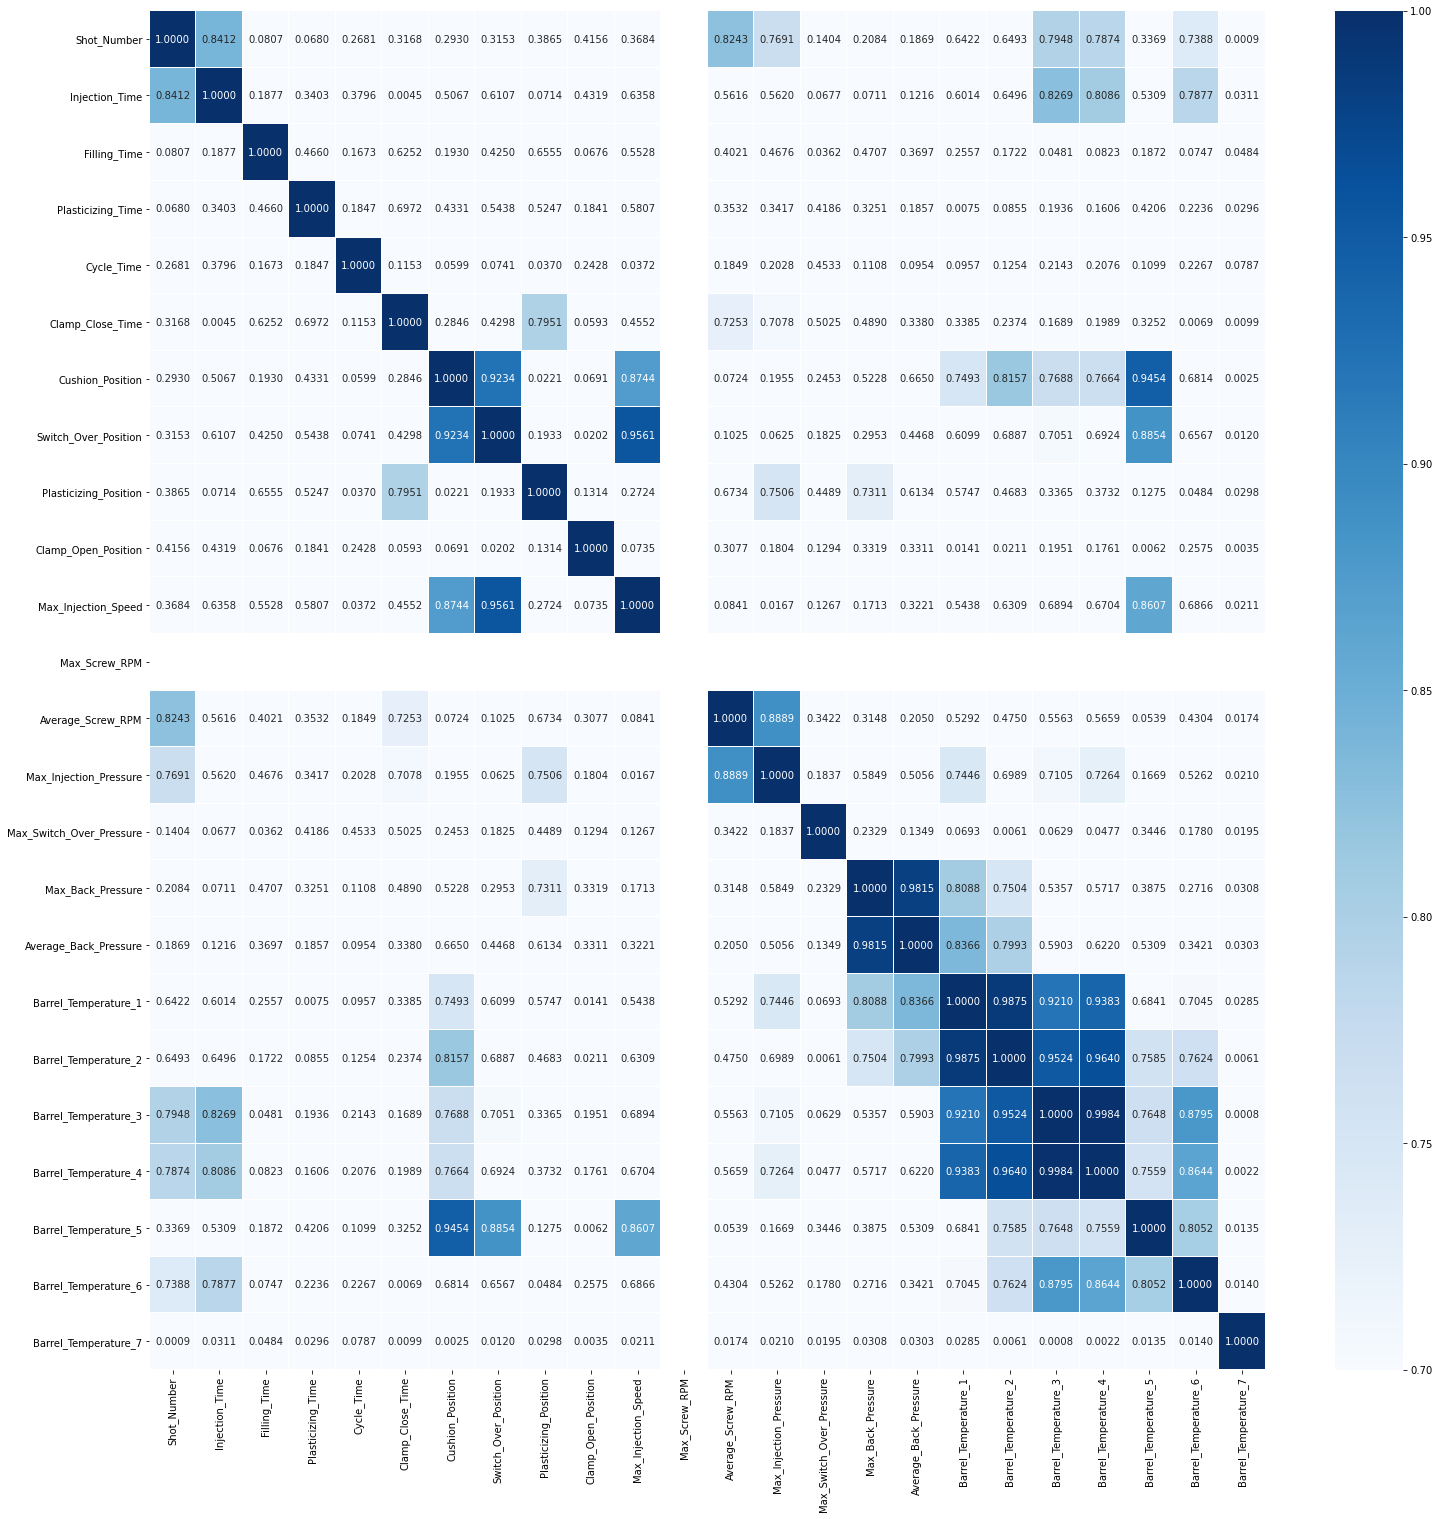

In [53]:
def IqrAllColumns(dataframe,mov_avg,rev_range):
    df=dataframe.fillna(0)
    df.index=pd.to_datetime(df['TimeStamp'], format = "%Y.%m.%d")
    df=df.iloc[:,5:]
    print(df['Max_Screw_RPM'].value_counts())
    level_1q = df['Max_Screw_RPM'].quantile(0.25)
    level_3q = df['Max_Screw_RPM'].quantile(0.75)
    IQR=level_3q - level_1q
    print(level_3q)
    for i in range(len(df.columns)):
        level_1q = df.iloc[:,i].quantile(0.25)
        level_3q = df.iloc[:,i].quantile(0.75)
        IQR=level_3q - level_1q
        df.iloc[:,i]=np.where(((level_1q - (rev_range * IQR)) >= df.iloc[:,i]) | (df.iloc[:,i] >= (level_3q + (rev_range * IQR))),df.iloc[:,i].median(), df.iloc[:,i])
    return df

df_no_outlier=IqrAllColumns(moldset_labeled_GURAD,4,3)
print(df_no_outlier['Max_Screw_RPM'].value_counts())
corr_=df_no_outlier.corr().abs()
plt.subplots(figsize=(25,25))
sns.heatmap(data = corr_,vmin=0.7, linewidths=0.1, annot=True, fmt= '.4f',cmap='Blues')

72


<AxesSubplot:>

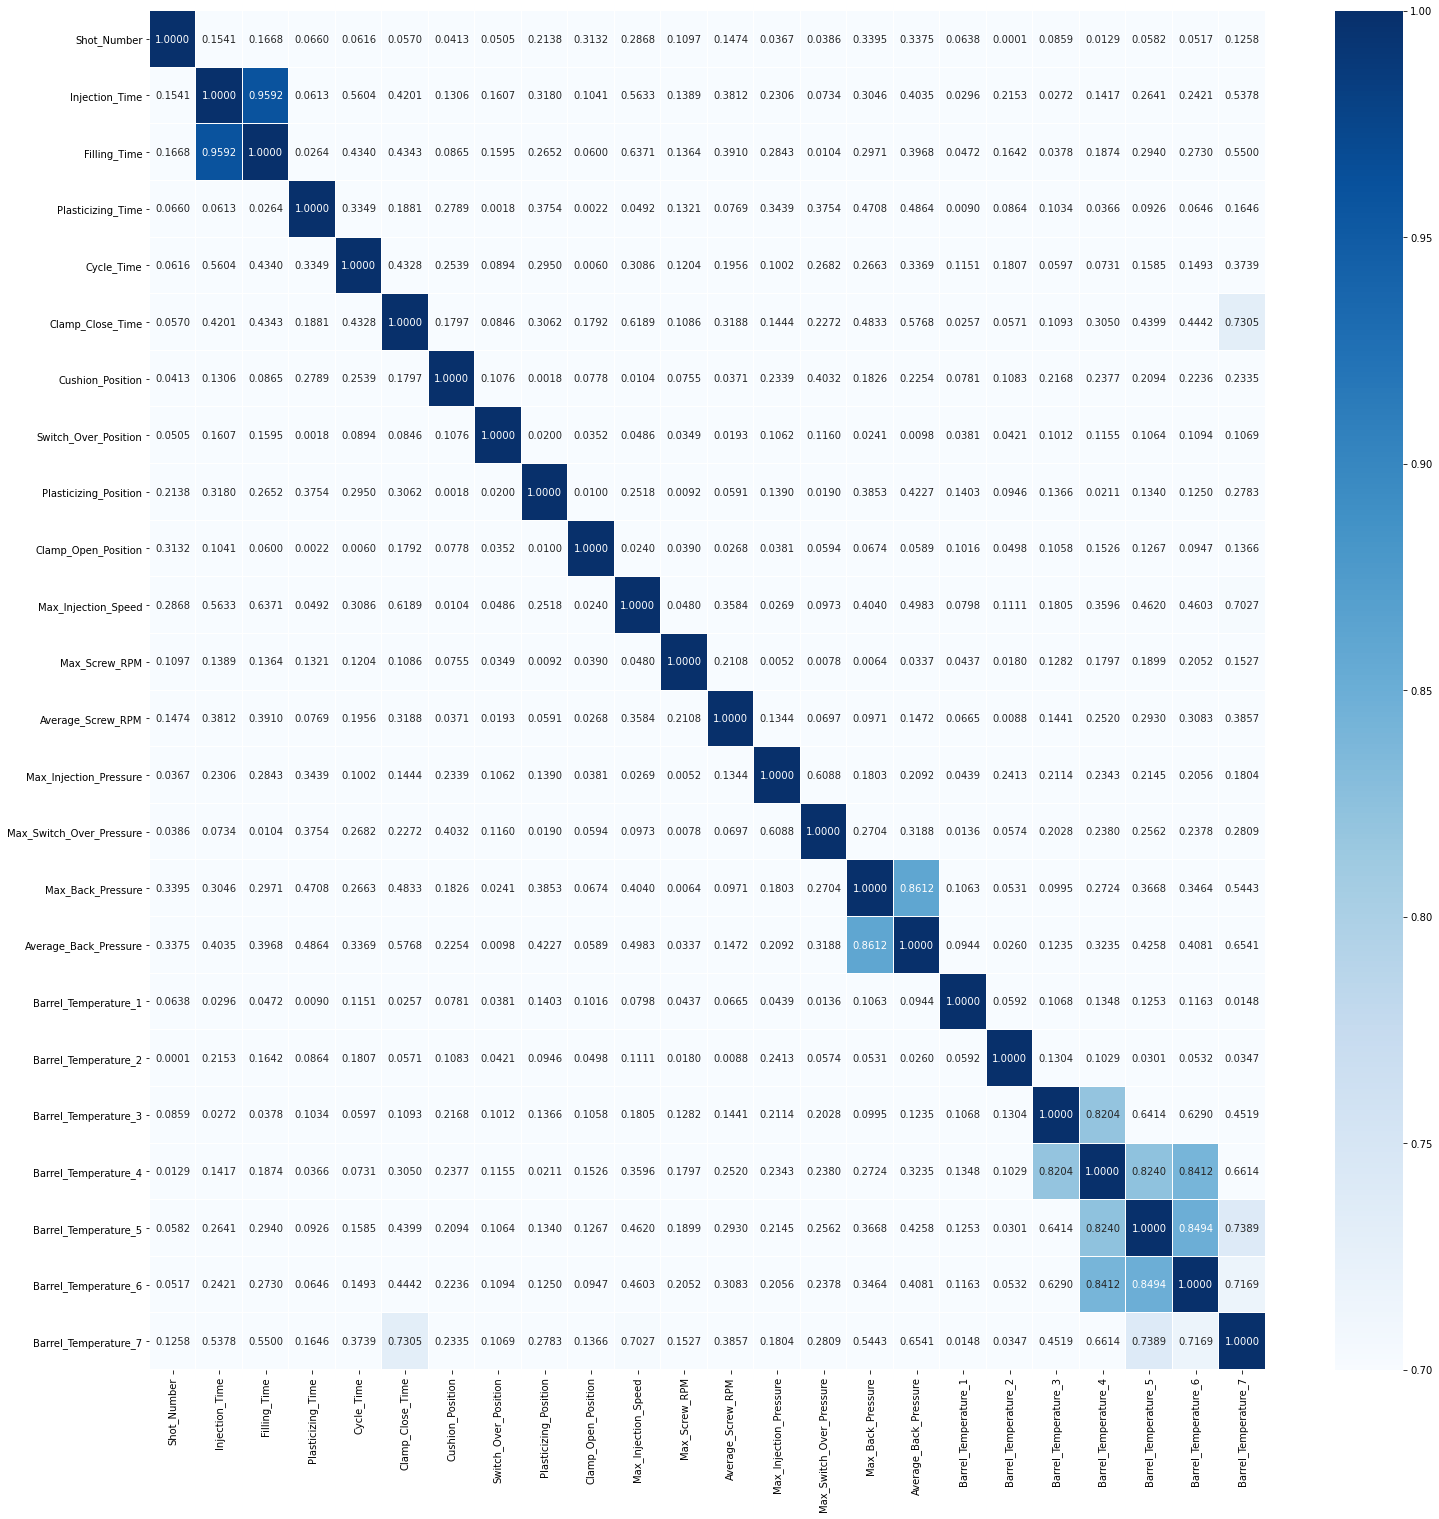

In [51]:

def MakeAvgCorr(dataframe):
    new_list=pd.DataFrame()
    df=dataframe
    # ind=df.groupby(pd.Grouper(freq='D')).corr().index
    # print(df.groupby(pd.Grouper(freq='D')).corr())
    # print(df)
    
    group_obj=df.groupby(pd.Grouper(freq='D'))
    ind=group_obj.mean().dropna().index
    print(ind.size)
    # print(group_obj['TimeStamp'].value_counts())
    # print(df.groupby(pd.Grouper(freq='D')).dropna().get_group("2021-12-19"))
    
    for i in range(ind.size):
        # print(type(group_obj.get_group(ind[i]).corr()))
        new_list=new_list.add(group_obj.get_group(ind[i]).corr(),fill_value=0)
    return pd.DataFrame.from_dict(new_list/ind.size)

df_date_avg=MakeAvgCorr(df_no_outlier)
corr_=df_date_avg.corr().abs()
plt.subplots(figsize=(25,25))
sns.heatmap(data = corr_,vmin=0.7, linewidths=0.1, annot=True, fmt= '.4f',cmap='Blues')


<AxesSubplot:>

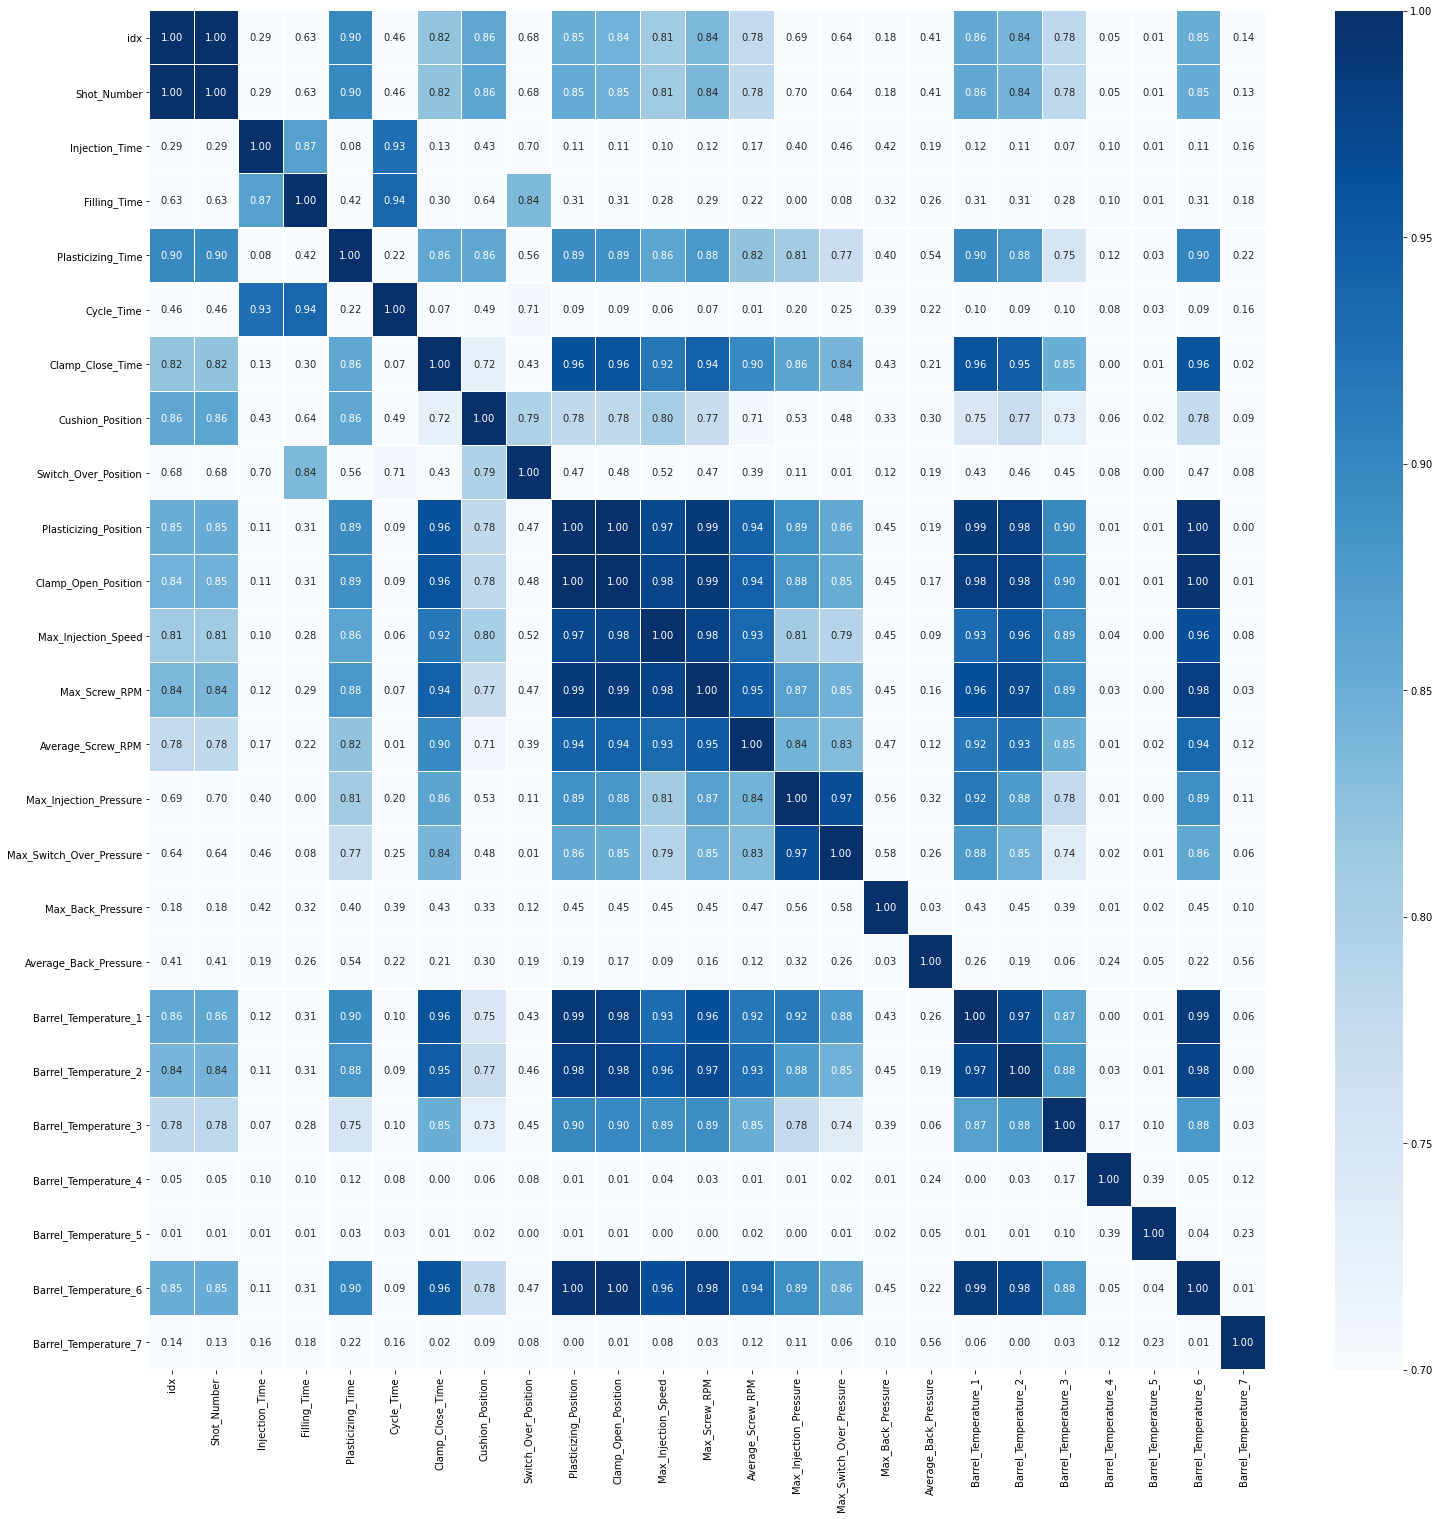

In [42]:
corr_mol9=moldset_labeled_ROSSO.corr().abs()
plt.subplots(figsize=(25,25))
sns.heatmap(data = corr_mol9,vmin=0.7, linewidths=0.1, annot=True, fmt= '.2f',cmap='Blues')

In [6]:
#불필요한 특성을 dataframe에서 삭제함.
moldset_labeled.drop(columns={'_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 'Reason', 
                         "Mold_Temperature_1", "Mold_Temperature_2", "Barrel_Temperature_7", "Switch_Over_Position",
                         "Mold_Temperature_5", "Mold_Temperature_6", "Mold_Temperature_7", "Mold_Temperature_8", "Mold_Temperature_9", "Mold_Temperature_10",
                          "Mold_Temperature_11", "Mold_Temperature_12"}, inplace=True)

In [7]:
moldset_unlabeled = pd.read_csv(r'unlabeled_data.csv', index_col=0)

In [8]:
#불필요한 특성을 dataframe에서 삭제함.
moldset_unlabeled.drop(columns={'_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 
'ERR_FACT_QTY',
                         "Mold_Temperature_1", "Mold_Temperature_2", "Barrel_Temperature_7", "Switch_Over_Position",
                         "Mold_Temperature_5", "Mold_Temperature_6", "Mold_Temperature_7", "Mold_Temperature_8", "Mold_Temperature_9", "Mold_Temperature_10",
                          "Mold_Temperature_11", "Mold_Temperature_12"}, inplace=True)

In [9]:
#사출성형 시 분석하는 제품을 제품 코드로 선택 후 데이터셋을 분리함
moldset_labeled_cn7 = moldset_labeled[(moldset_labeled['PART_NO']=='86131AA000') | (moldset_labeled['PART_NO']=='86141AA000')]
moldset_labeled_cn7.drop(columns={'PART_NO'}, inplace=True)

moldset_labeled_rg3 = moldset_labeled[(moldset_labeled['PART_NO']=='86131T1000') | (moldset_labeled['PART_NO']=='86141T1000')]
moldset_labeled_rg3.drop(columns={'PART_NO'}, inplace=True)

moldset_unlabeled_cn7 = moldset_unlabeled[(moldset_unlabeled['PART_NO']=='86131AA000') | (moldset_unlabeled['PART_NO']=='86141AA000')]
moldset_unlabeled_cn7.drop(columns={'PART_NO'}, inplace=True)

moldset_unlabeled_rg3 = moldset_unlabeled[(moldset_unlabeled['PART_NO']=='86131T1000') | (moldset_unlabeled['PART_NO']=='86141T1000')]
moldset_unlabeled_rg3.drop(columns={'PART_NO'}, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
moldset_unlabeled_cn7.describe() #결과는 아래에서 확인 가능하다.

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,...,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000
mean,6.424337,4.218894,10.436911,50.905432,5.141773,359.175364,52.581079,434.434858,56.389434,16.472642,...,27.234318,145.529239,267.087272,268.502999,265.401555,254.059596,233.254549,57.740971,12.841428,14.730523
std,3.020516,1.444531,7.396193,13.369645,1.868678,317.320806,13.087495,235.942618,29.437641,15.334763,...,29.014509,135.601133,11.345312,10.124143,8.909881,7.613118,6.257067,10.945172,12.181921,14.162900
min,1.000000,0.300000,0.500000,0.000000,2.800000,15.800000,32.180000,0.000000,25.100000,0.000000,...,0.000000,0.000000,244.200000,231.600000,239.100000,234.400000,219.200000,34.300000,0.000000,0.000000
25%,5.000000,3.890000,2.800000,36.600000,3.200000,17.300000,40.300000,485.900000,36.500000,0.000000,...,0.000000,0.000000,264.600000,264.900000,264.800000,254.600000,229.800000,57.800000,0.000000,0.000000
50%,5.000000,4.490000,12.810000,59.520000,5.990000,653.410000,52.660000,522.200000,49.900000,30.300000,...,12.200000,245.100000,264.900000,269.900000,269.400000,255.000000,234.700000,61.600000,20.500000,22.000000
75%,9.560000,5.000000,16.860000,63.600000,7.120000,653.560000,68.470000,647.990000,56.100000,30.700000,...,59.300000,276.100000,275.400000,275.000000,270.500000,259.600000,239.900000,65.200000,23.400000,26.700000
max,11.400000,6.000000,97.080000,119.880000,7.270000,655.330000,75.750000,652.000000,128.200000,62.900000,...,112.900000,287.500000,286.200000,285.800000,279.000000,267.200000,242.800000,73.400000,38.600000,48.600000


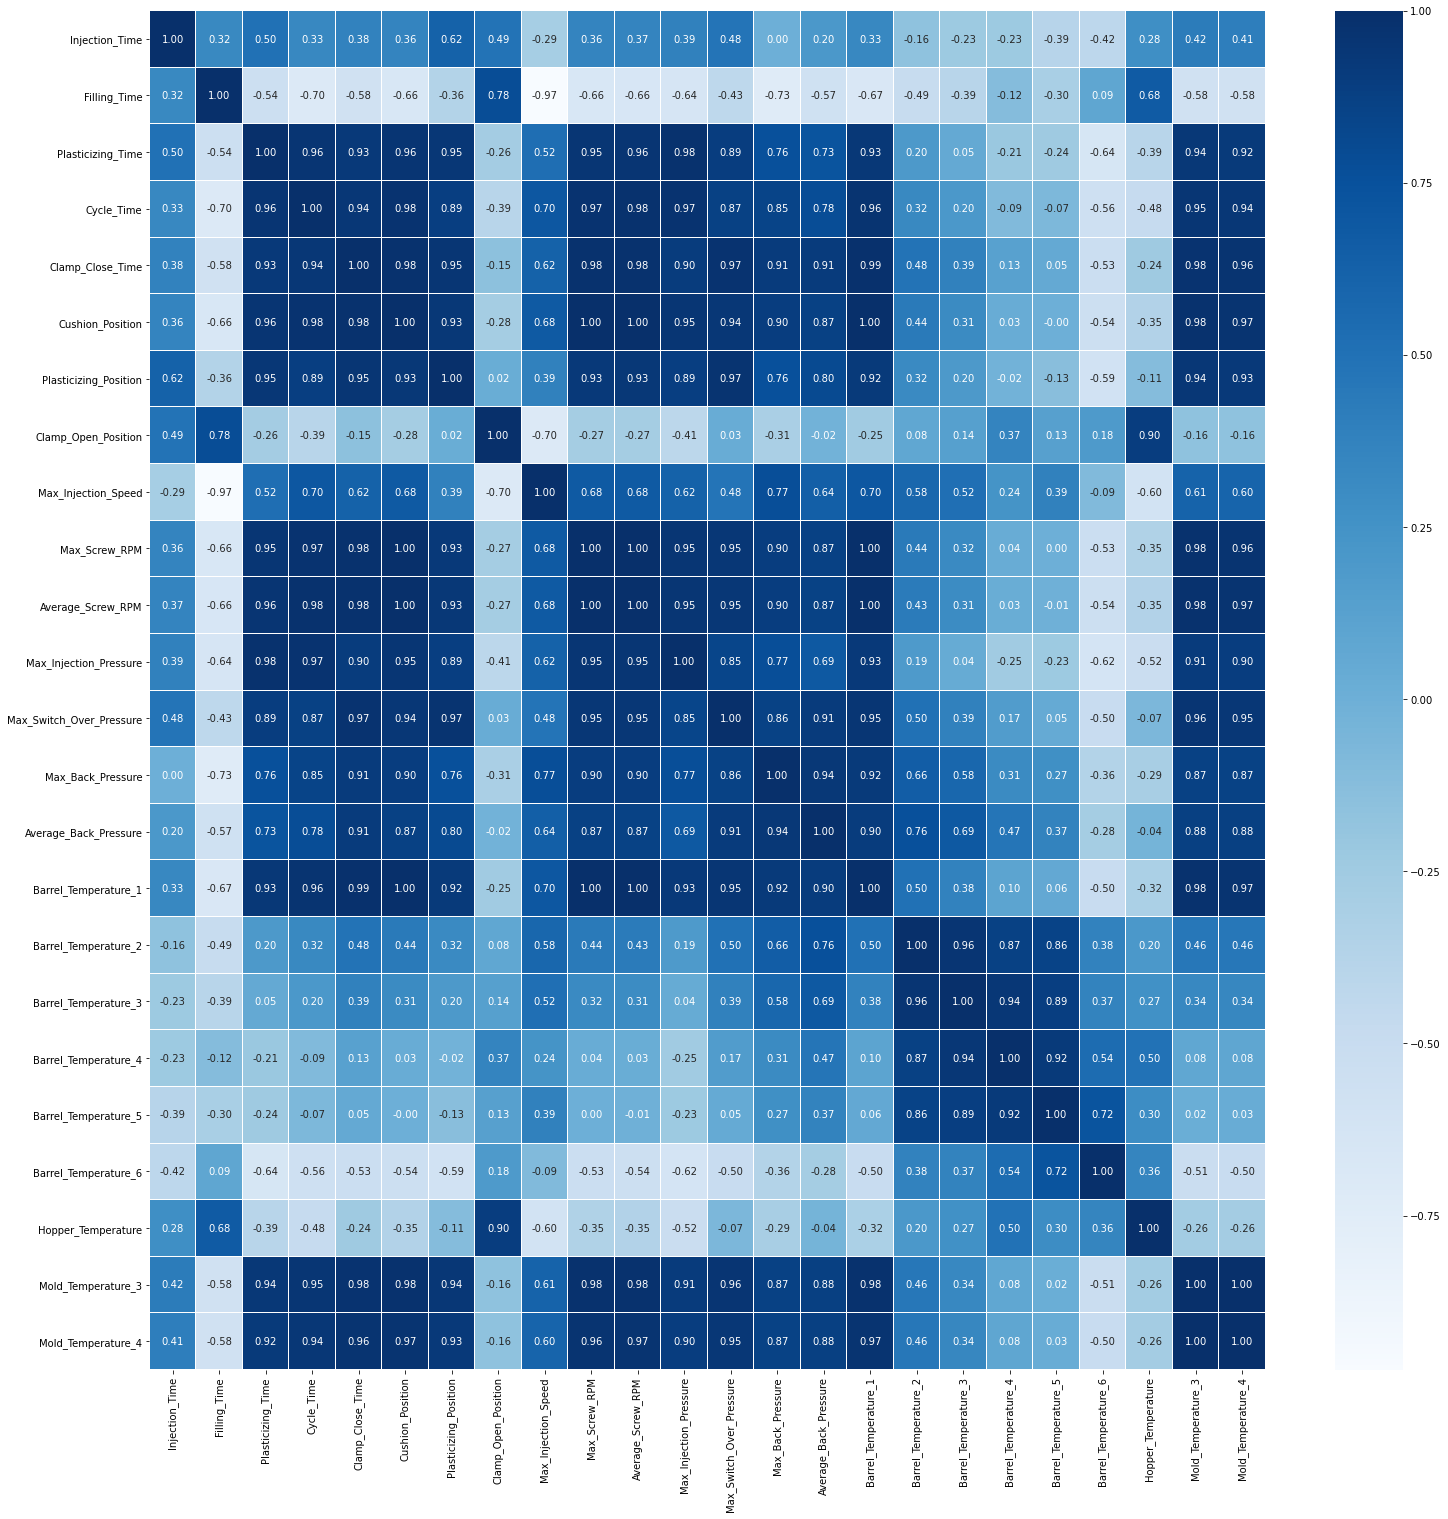

In [11]:
import seaborn as sns

plt.subplots(figsize=(25,25))
sns.heatmap(data = moldset_unlabeled_cn7.corr(), linewidths=0.1,annot=True, fmt ='.2f', cmap='Blues')
 #결과는 아래에서 확인 가능하다.

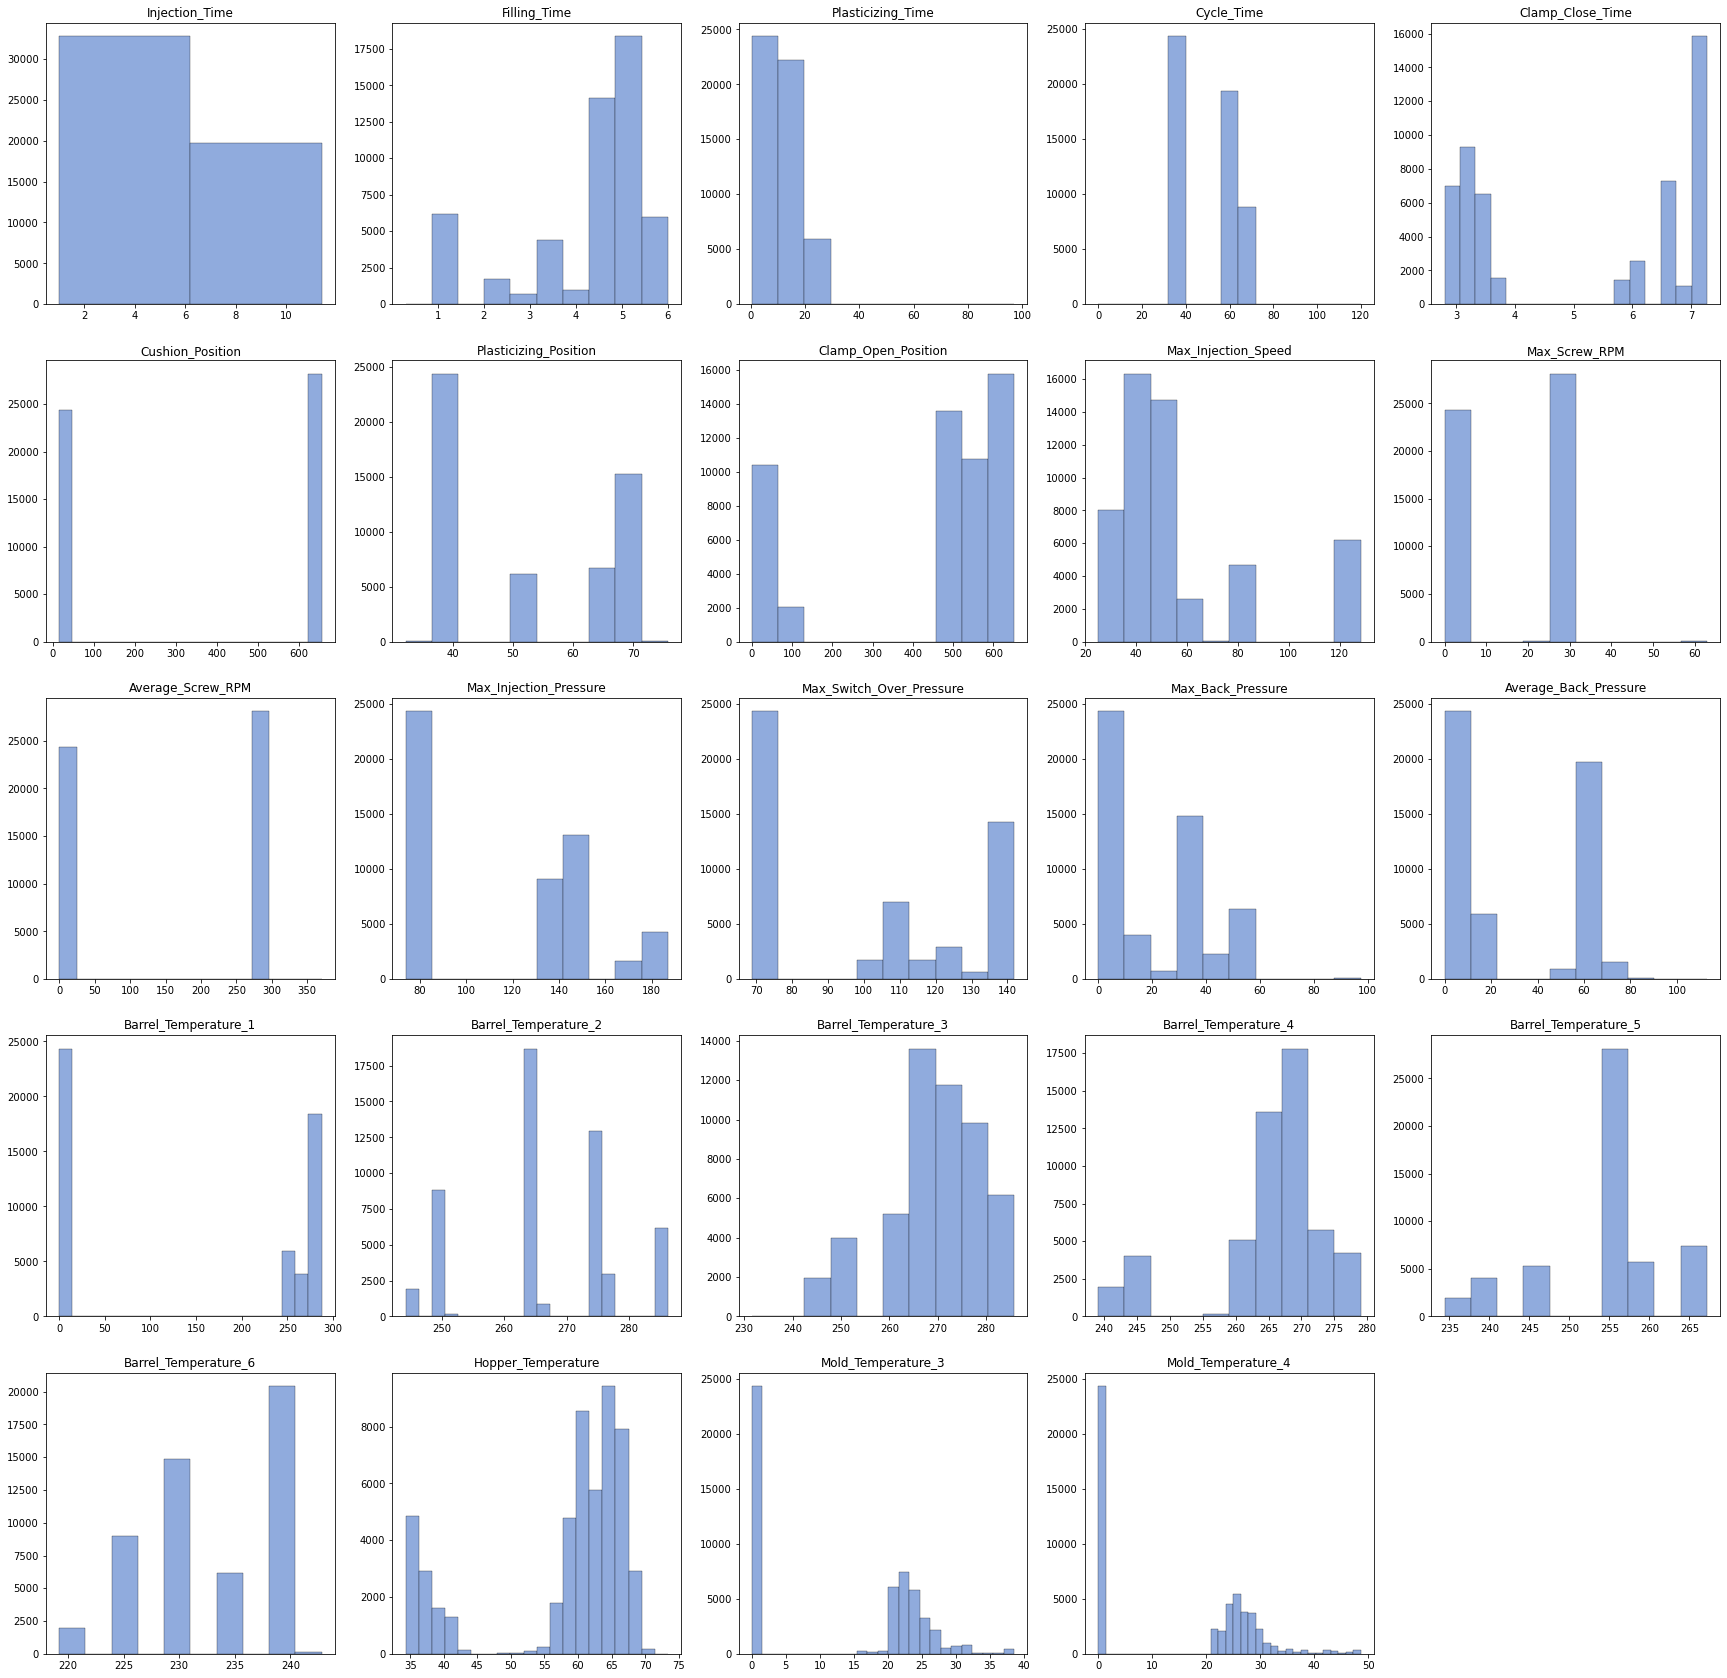

In [12]:
plt.figure(figsize = (30,30))

# 각 변수의 막대그래프 개수
bin = [2,10,10,15,17,20,10,10,10,10,15,10,10,10,10,20,20,10,10,10,10,20,25,35,35] 

for index, value in enumerate(moldset_unlabeled_cn7):
    sub = plt.subplot(5,5,index +1) 
    sub.hist(moldset_unlabeled_cn7[value], bins = bin[index], facecolor = (144/255,171/255,221/255), linewidth=.3, edgecolor ='black')
    plt.title(value) #결과는 아래에서 확인 가능하다.

In [13]:
moldset_unlabeled_rg3.describe() #결과는 아래에서 확인 가능하다.

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,...,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000
mean,3.515335,2.778947,9.631108,53.469702,5.357147,405.104732,48.223423,209.289599,86.657328,20.604886,...,36.580767,169.379563,273.179625,274.535830,269.174136,259.571657,235.694215,58.029599,14.053569,15.813630
std,2.837536,2.087176,6.238300,12.758191,1.633415,310.466273,7.846830,243.368693,41.854656,18.345535,...,33.234145,136.544147,12.796782,12.004843,9.526382,8.061772,4.830513,9.782343,11.607758,13.580681
min,0.130000,0.000000,0.400000,0.000000,2.800000,0.000000,33.350000,0.000000,0.000000,0.000000,...,0.000000,0.000000,244.200000,234.400000,239.100000,234.400000,219.500000,33.200000,0.000000,0.000000
25%,1.050000,0.930000,2.900000,38.900000,3.400000,18.700000,40.500000,4.630000,39.900000,0.000000,...,0.000000,0.000000,264.800000,269.900000,269.800000,259.800000,234.800000,58.000000,0.000000,0.000000
50%,2.630000,1.650000,12.800000,61.760000,6.640000,654.250000,52.540000,35.630000,79.500000,30.700000,...,58.200000,246.000000,265.400000,270.100000,270.200000,260.300000,235.100000,61.300000,20.500000,22.000000
75%,5.000000,5.000000,13.030000,63.600000,6.740000,654.280000,53.570000,522.100000,127.500000,30.900000,...,60.800000,286.000000,285.100000,285.000000,275.200000,265.000000,239.900000,64.100000,22.400000,24.000000
max,11.390000,6.000000,38.710000,76.190000,15.100000,655.160000,72.760000,654.990000,128.800000,62.900000,...,136.000000,287.600000,286.700000,286.000000,278.100000,266.900000,241.000000,71.200000,34.800000,45.900000


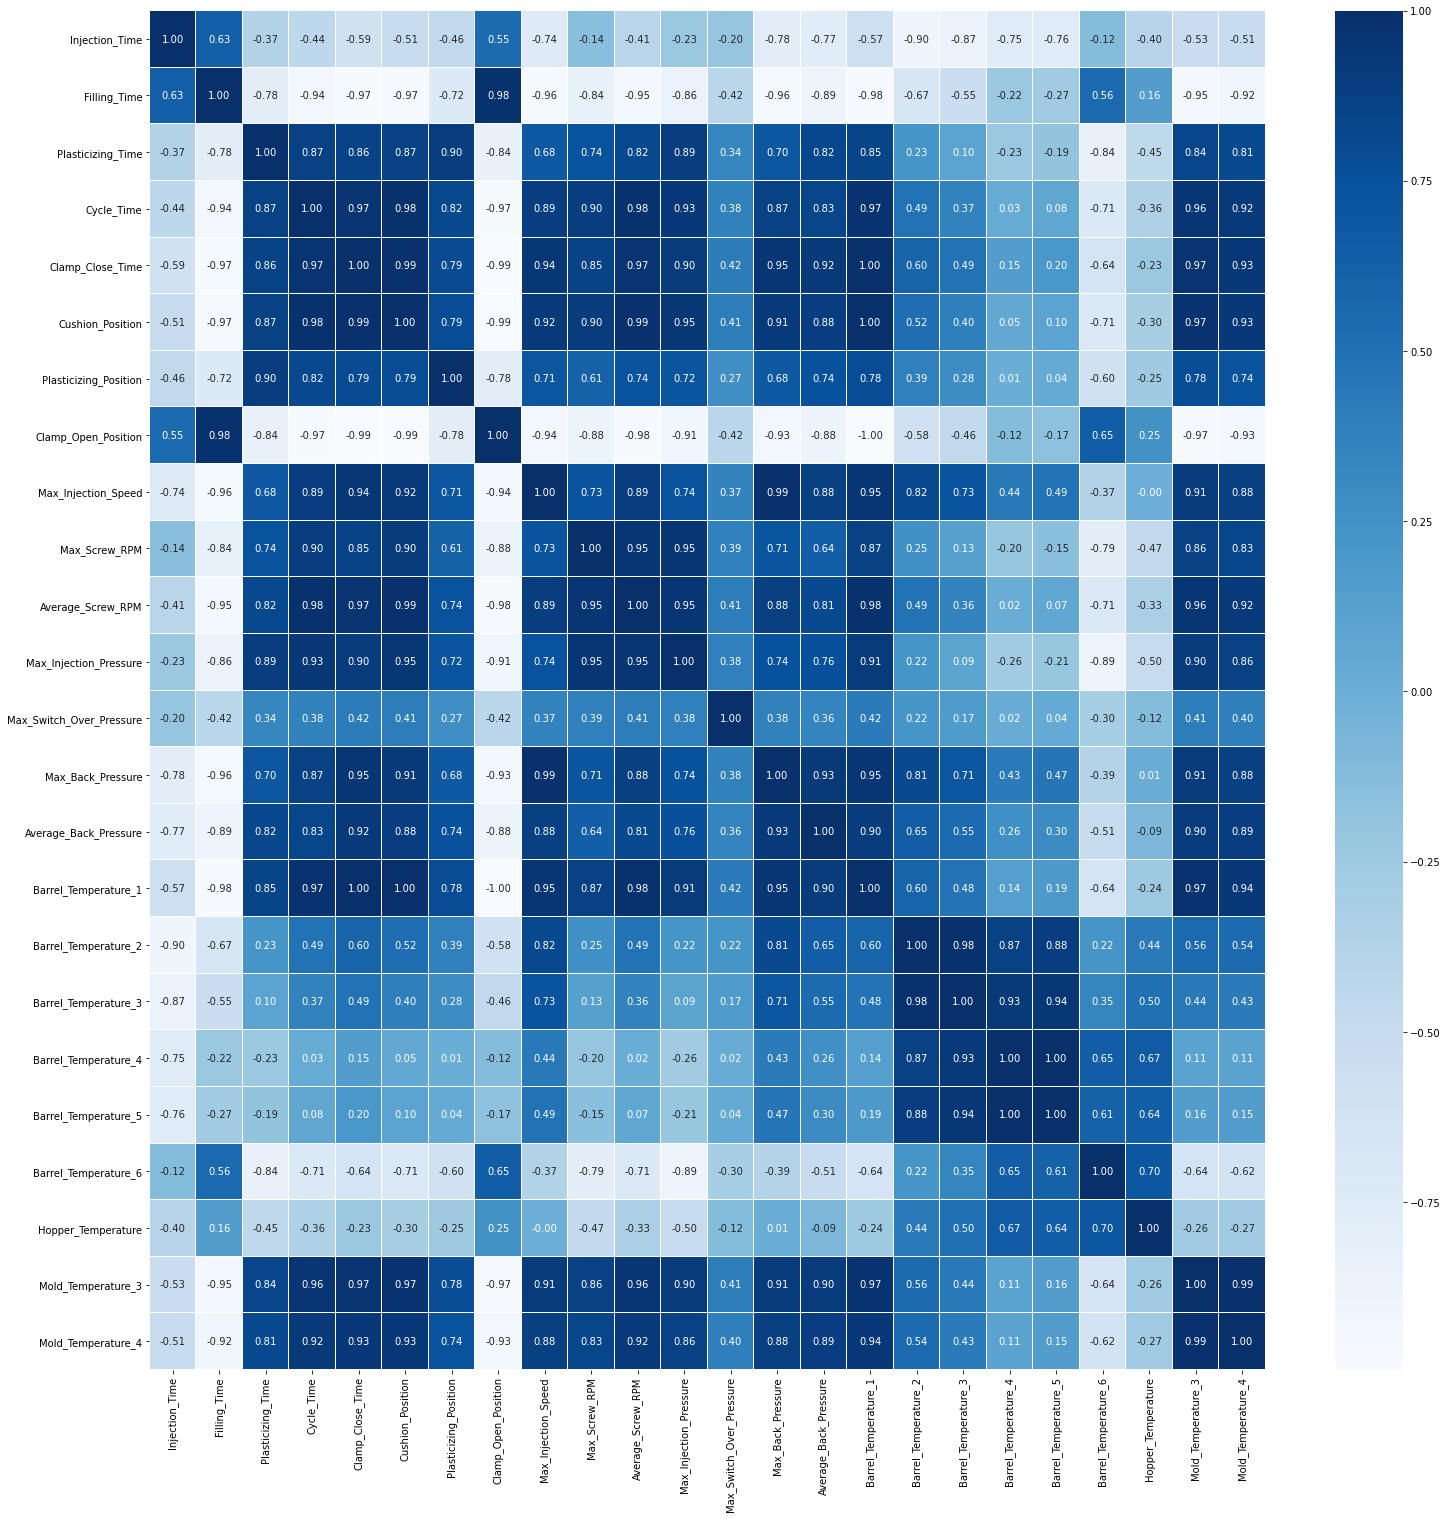

In [14]:
plt.subplots(figsize=(25,25))
sns.heatmap(data = moldset_unlabeled_rg3.corr(), linewidths=0.1,annot=True, fmt ='.2f', cmap='Blues')
 #결과는 아래에서 확인 가능하다.

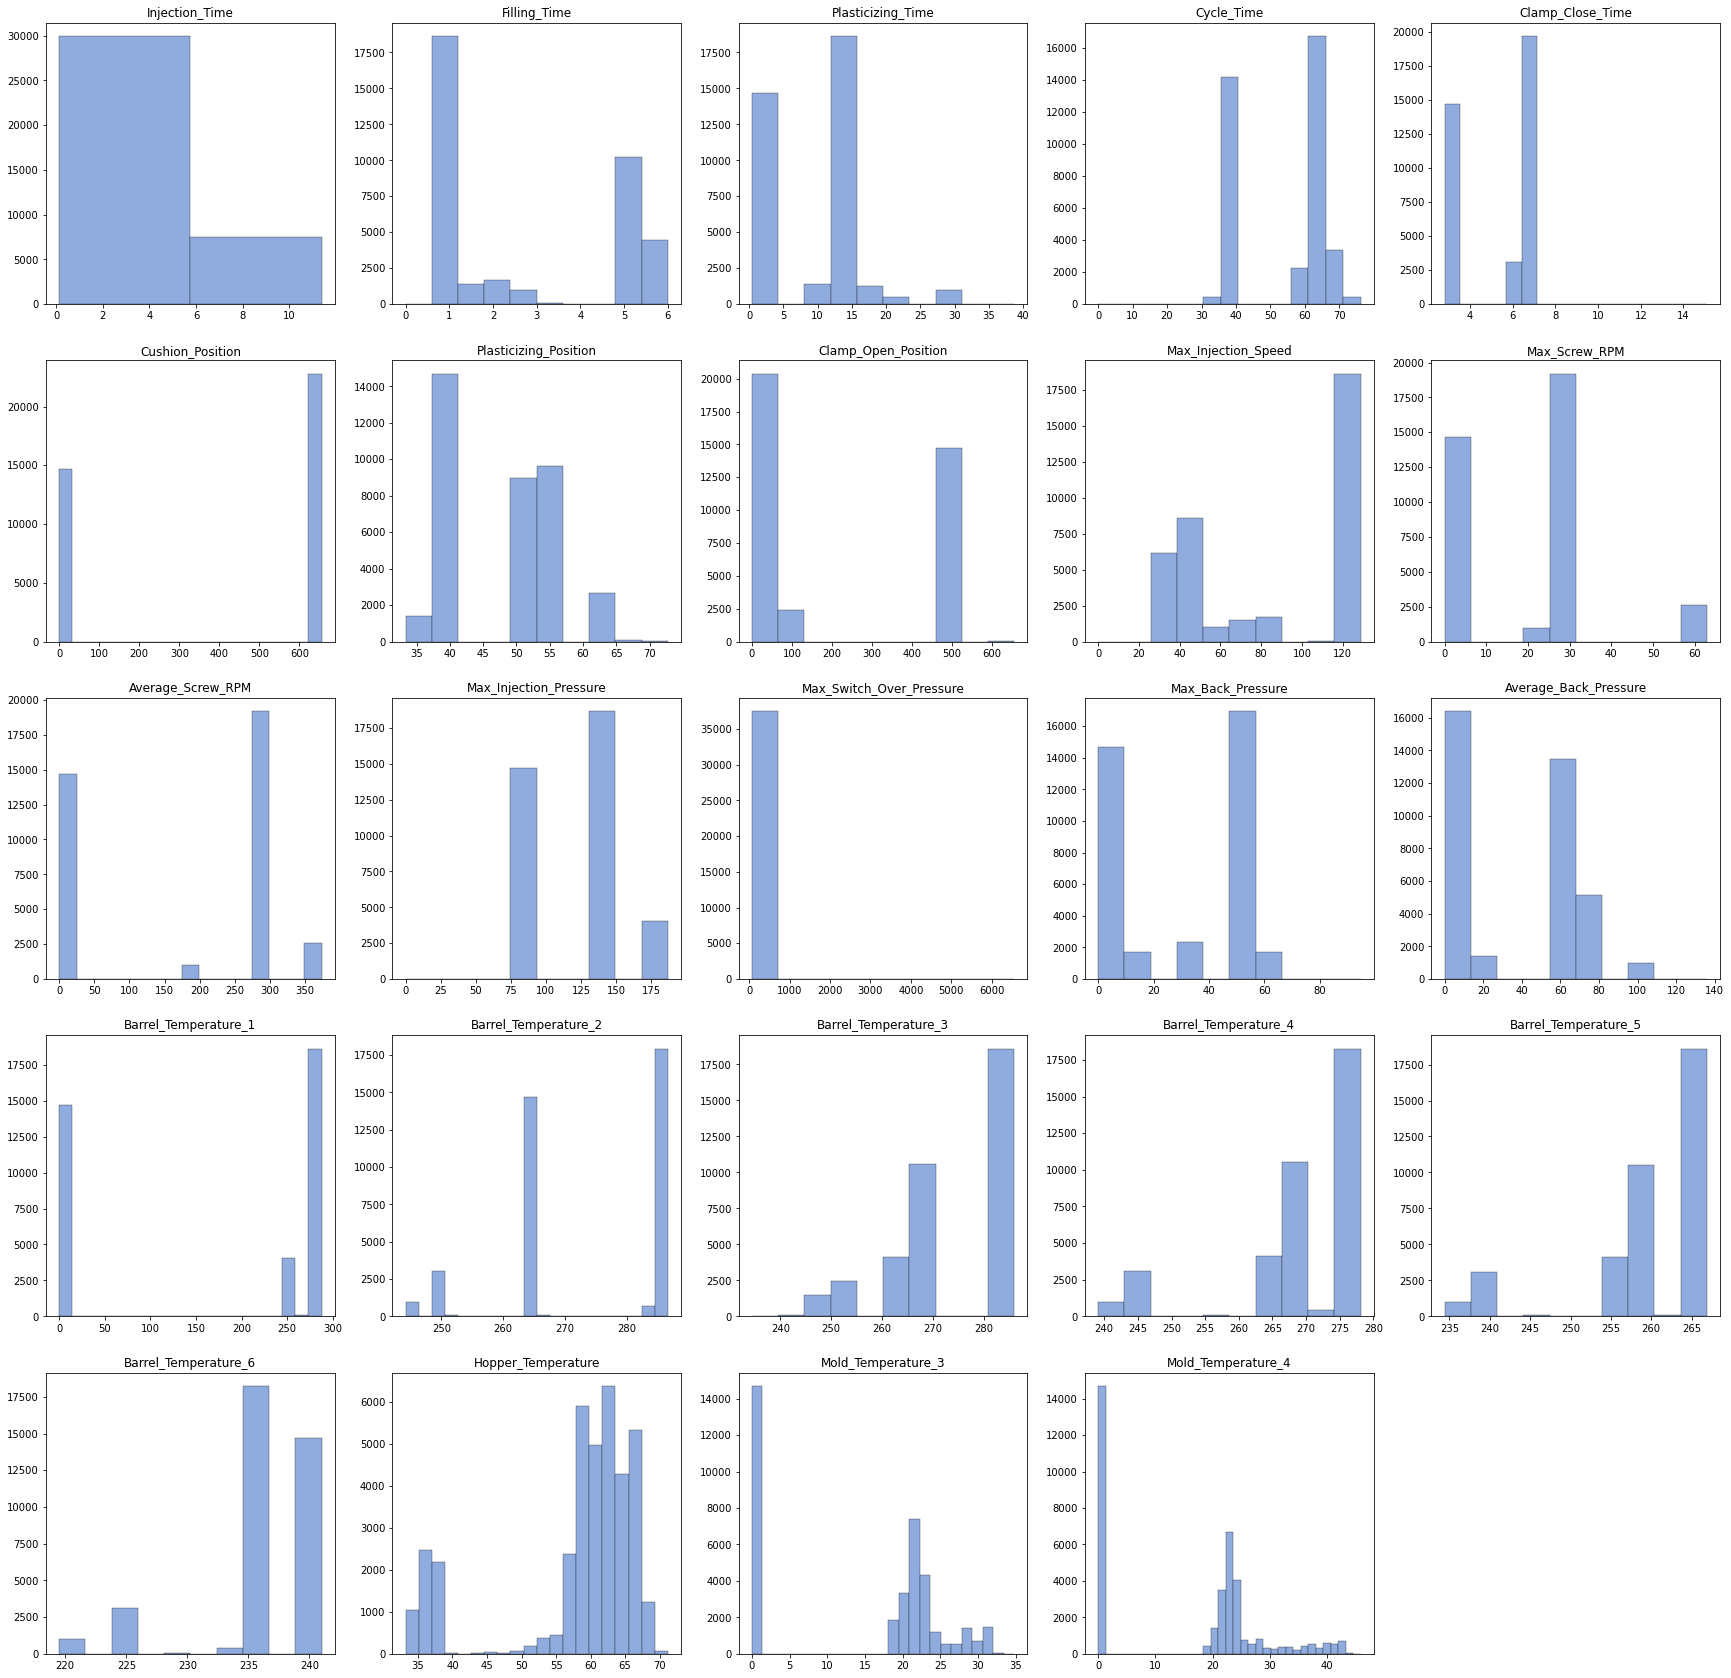

In [15]:
plt.figure(figsize = (30,30))

# 각 변수의 막대그래프 개수
bin = [2,10,10,15,17,20,10,10,10,10,15,10,10,10,10,20,20,10,10,10,10,20,25,35,35] 

for index, value in enumerate(moldset_unlabeled_rg3):
    sub = plt.subplot(5,5,index +1) 
    sub.hist(moldset_unlabeled_rg3[value], bins = bin[index], facecolor = (144/255,171/255,221/255), linewidth=.3, edgecolor ='black')
    plt.title(value)  #결과는 아래에서 확인 가능하다.

In [16]:
moldset_labeled_rg3['PassOrFail'] = moldset_labeled_rg3['PassOrFail'].map({0:int(0), 1:int(1)})
moldset_labeled_cn7['PassOrFail'] = moldset_labeled_cn7['PassOrFail'].map({0:int(0), 1:int(1)})

<ipython-input-16-e1d7598392fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moldset_labeled_rg3['PassOrFail'] = moldset_labeled_rg3['PassOrFail'].map({0:int(0), 1:int(1)})
<ipython-input-16-e1d7598392fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moldset_labeled_cn7['PassOrFail'] = moldset_labeled_cn7['PassOrFail'].map({0:int(0), 1:int(1)})


In [17]:
labeled_data = [moldset_labeled_cn7, moldset_labeled_rg3]
for d in labeled_data:
    print('양품 수: {}'.format(d[d['PassOrFail']==0].shape[0]))
    print('불량품 수: {}'.format(d[d['PassOrFail']==1].shape[0]))
    print('='*10) #결과는 아래에서 확인 가능하다.

양품 수: 1398
불량품 수: 27
양품 수: 1157
불량품 수: 25


In [18]:
from sklearn.preprocessing import StandardScaler

data = [moldset_labeled_cn7, moldset_labeled_rg3, moldset_unlabeled_cn7, moldset_unlabeled_rg3]
for d in data:
    for column in d.columns:
        if column !='PassOrFail':
            sc = StandardScaler()
            d[[column]] = sc.fit_transform(d[[column]])

<ipython-input-18-7ccec358a115>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d[[column]] = sc.fit_transform(d[[column]])
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-18-7ccec358a115>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

<ipython-input-18-7ccec358a115>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d[[column]] = sc.fit_transform(d[[column]])
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [19]:
moldset_labeled_cn7.to_csv(r'moldset_labeled_cn7.csv')
moldset_labeled_rg3.to_csv(r'moldset_labeled_rg3.csv')

In [20]:
moldset_unlabeled_cn7.to_csv(r'moldset_unlabeled_cn7.csv')
moldset_unlabeled_rg3.to_csv(r'moldset_unlabeled_rg3.csv')

In [21]:
def confident_prediction(df):
    result = []
    
    for i in range(len(df)):
        if df[i][0] >= df[i][1]:
            result.append(df[i][0])
        else:
            result.append(df[i][1])     
    return result

In [22]:
#심층 신경망에서 사용
def confident_prediction_1(df):
    result = []
    
    for i in range(len(df)):
        if df[i] >=0.5:
            result.append(df[i])
        else:
            result.append(1-df[i])
    return result

In [23]:
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score, accuracy_score, f1_score, confusion_matrix

def evaluation(y,y_pred):
    print("Accuracy: {:.2f}".format(accuracy_score(y,y_pred)))
    print("Precision: {:.2f}".format(precision_score(y,y_pred)))
    print("Recall: {:.2f}".format(recall_score(y,y_pred)))
    print(roc_auc_score(y,y_pred))
    print(f1_score(y,y_pred))
    print(confusion_matrix(y,y_pred))

In [24]:
class DataLoader():
    
    def __init__(self):
        #클래스 변수가 존재하는 데이터를 불러옴
        moldset_labeled = pd.read_csv(r'./moldset_labeled_cn7.csv', low_memory=False, index_col=False)
        moldset_labeled.drop(columns={'Unnamed: 0'}, inplace=True)
        #클래스 변수가 존재하지 않는 데이터를 불러옴
        moldset_unlabeled = pd.read_csv(r'./moldset_unlabeled_cn7.csv', low_memory=False, index_col=False)
        moldset_unlabeled.drop(columns={'Unnamed: 0'}, inplace=True)
        #평가 데이터의 비율을 test_size로 지정함
        sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
        for train_index, test_index in sss.split(moldset_labeled.loc[:, moldset_labeled.columns!='PassOrFail'], moldset_labeled['PassOrFail']):
            moldset_labeled_train_X = moldset_labeled.loc[:, moldset_labeled.columns!='PassOrFail'].iloc[train_index]
            moldset_labeled_test_X = moldset_labeled.loc[:, moldset_labeled.columns!='PassOrFail'].iloc[test_index]
            moldset_labeled_train_Y = moldset_labeled['PassOrFail'].iloc[train_index]
            moldset_labeled_test_Y = moldset_labeled['PassOrFail'].iloc[test_index]
        #학습데이터
        self.moldset_labeled_train_X = moldset_labeled_train_X
        #평가데이터
        self. moldset_labeled_test_X =  moldset_labeled_test_X
        #학습데이터의 클래스 변수
        self.moldset_labeled_train_Y = moldset_labeled_train_Y
        #평가데이터의 클래스 변수
        self.moldset_labeled_test_Y = moldset_labeled_test_Y
        #클래스 변수가 없는 데이터
        self.moldset_unlabeled = moldset_unlabeled

In [25]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.svm import SVC
#탐색할 하이퍼 파라미터의 최대, 최소 범위를 설정한다.
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [i*1e-4 for i in range(1, 100)], 'C': [i*1e-4 for i in range(1, 100)]}]
scores = ['accuracy','precision', 'recall']
weights = {0:100.0, 1:1.0}
#층화추출법을 활용하여 클래스 별 비율이 유지되도록 한다.
kf = StratifiedKFold(random_state=42, n_splits=5, shuffle=True)
X = pd.read_csv(r'./moldset_labeled_cn7.csv', low_memory=False, index_col=False)
X.drop(columns={'Unnamed: 0'}, inplace=True)
y = X.pop('PassOrFail')
for score in scores:
    clf = GridSearchCV(SVC(class_weight=weights), scoring=score, param_grid=tuned_parameters, n_jobs=-1, cv=kf, refit=True, verbose=0)
    clf.fit(X, y)
	#최적의 하이퍼 파라미터 짝을 반환한다.
    print('Best Params: {}'.format(clf.best_params_))   #결과는 아래에서 확인 가능하다.

Best Params: {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
Best Params: {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
Best Params: {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}


In [26]:
#7-1-1. 모델 학습 및 평가 함수 가이드
def train_and_evaluate(percentage=10, unlabeled_usage=90):
    
    data = DataLoader()
    X_test = data.moldset_labeled_test_X
    Y_test = data.moldset_labeled_test_Y
    X_with_label = data.moldset_labeled_train_X
    Y_with_label = data.moldset_labeled_train_Y
    moldset_unlabeled = data.moldset_unlabeled
    without_label = moldset_unlabeled
    
	#남은 클래스 변수가 존재하지 않는 데이터의 개수
    num_left_unlabeled =int(moldset_unlabeled.shape[0]*(100-unlabeled_usage)*0.01)
    
    #7-1-2. 구현된 모델 불러오기 / 모델 정의 가이드
    while True:
        if without_label.shape[0] >= num_left_unlabeled:
			#클래스 별 데이터 비율
            weights = {0:100.0, 1:1.0}
			#최적의 하이퍼 파라미터 사용
            model = SVC(C=0.001, kernel='rbf', gamma=1e-2, class_weight=weights, probability=True, random_state=42)
            model.fit(X_with_label, Y_with_label)
            y_pred = model.predict(X_test)
            evaluation(Y_test, y_pred)

            #7-1-3. Unlabeled 데이터에 대한 예측
            prob = model.predict_proba(without_label)
            confident_prob = confident_prediction(prob)
            confident_prediction(prob)
            without_label['confidence'] = confident_prob
            
            #이 과정에서 내림차순 정렬
            without_label = without_label.sort_values(by=['confidence'], ascending=False)
            length = without_label.shape[0]
            cutting_index =int(length*(percentage*0.01))
            chosen_without_label = without_label.iloc[:cutting_index, :]
            chosen_without_label.drop(columns={'confidence'}, inplace=True)
            notchosen_without_label = without_label.iloc[cutting_index:, :].drop(columns={'confidence'})
            pseudo_label =  pd.DataFrame(model.predict(chosen_without_label))

   	    #7-1-4. Labeled 데이터와 통합 후 학습
            #데이터 업데이트
            X_with_label = pd.concat([X_with_label, chosen_without_label])
            Y_with_label = pd.concat([Y_with_label, pseudo_label])
            without_label = notchosen_without_label
            y_pred = model.predict(X_test)
            evaluation(Y_test, y_pred)
            
        else:
            print()
            print("ALL DONE, UNLABELED USED: {:.0%}".format(without_label.shape[0]/num_left_unlabeled))
            break   #결과는 아래에서 확인 가능하다.

In [27]:
train_and_evaluate()

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWar

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined a

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined a

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWar


Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWar

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWar

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWar

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWar

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWar

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWar

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWar

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWar

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWar

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWar

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWar

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWar

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWar

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWar

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWar

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]

ALL DONE, UNLABELED USED: 99%


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
def predict(df):
    result = []
    
    for i in range(len(df)):
        if df[i] >=0.5:
            result.append(1)
        else:
            result.append(0)
    return result  

In [31]:
#8-1-1. Keras Package를 활용하여 학습에 필요한 변수 생성
def train_and_evaluate(percentage=10, unlabeled_usage=90):
    data = DataLoader()
    X_test = data.moldset_labeled_test_X
    Y_test = data.moldset_labeled_test_Y
    X_with_label = data.moldset_labeled_train_X
    Y_with_label = data.moldset_labeled_train_Y
    moldset_unlabeled = data.moldset_unlabeled
    without_label = moldset_unlabeled
	#남은 클래스 변수가 존재하지 않는 데이터의 개수
    num_left_unlabeled =int(moldset_unlabeled.shape[0]*(100-unlabeled_usage)*0.01)
    
    #8-1-2. 신경망을 순차적으로 쌓음
    model = Sequential()
	#units은 출력 차원 수
    model.add(Dense(units=32, activation='relu', input_dim=24))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])
    
    #8-1-3. 심층 신경망 모델을 이용하여 학습 진행하기
    while True:
        if without_label.shape[0] >= num_left_unlabeled:     
            val_precision =0
            val_recall =0
            patience =10
            cnt =0
            
            for epoch in range(100):
                history = model.fit(X_with_label, Y_with_label, epochs=1, validation_split=0.3)
                history = history.history  
                if cnt>= patience:
                    break
                if  history['val_precision'][0] >= val_precision and history['val_recall'][0] >= val_recall:
                    val_precision = history['val_precision'][0]
                    val_recall = history['val_recall'][0]
                    cnt =0
                else:
                    cnt+=1
            
            #8-1-4. 학습시킨 모델을 이용하여 목표값이 없는 데이터에 대한 예측 실행       
            prob = model.predict_proba(without_label)
            confident_prob = confident_prediction_1(prob)
            without_label['confidence'] = confident_prob
            without_label = without_label.sort_values(by=['confidence'], ascending=False)
            length = without_label.shape[0]
            cutting_index =int(length*(percentage*0.01))
            chosen_without_label = without_label.iloc[:cutting_index, :]
            chosen_without_label.drop(columns={'confidence'}, inplace=True)
            notchosen_without_label = without_label.iloc[cutting_index:, :].drop(columns={'confidence'})
            pseudo_label =  pd.DataFrame(predict(model.predict(chosen_without_label)))
            
            #8-1-5. UPDATE
            X_with_label = pd.concat([X_with_label, chosen_without_label])
            Y_with_label = pd.concat([Y_with_label, pseudo_label])
            without_label = notchosen_without_label
            
        else:
            print()
            print("ALL DONE, UNLABELED USED: {:.0%}".format(without_label.shape[0]/num_left_unlabeled))
            model.save('NN_rg3.h5')
            break       #결과는 아래에서 확인 가능하다.

In [32]:
train_and_evaluate()

22/22 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9900 - precision: 1.0000 - recall: 0.4615 - val_loss: 0.0462 - val_accuracy: 0.9800 - val_precision: 0.5000 - val_recall: 0.5000
Instructions for updating:
Please use `model.predict()` instead.


C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


137/137 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.9986 - precision: 0.8421 - recall: 0.8421 - val_loss: 8.9827e-26 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


  1/241 [..............................] - ETA: 0s - loss: 3.5517e-07 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


241/241 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.9993 - precision: 0.8182 - recall: 0.9474 - val_loss: 3.2944e-25 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


  1/334 [..............................] - ETA: 0s - loss: 1.5526e-19 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


334/334 [==============================] - 0s 1ms/step - loss: 7.8326e-04 - accuracy: 0.9992 - precision: 0.8667 - recall: 0.6842 - val_loss: 4.0714e-29 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


  1/418 [..............................] - ETA: 0s - loss: 1.9114e-14 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


418/418 [==============================] - 1s 1ms/step - loss: 6.2939e-04 - accuracy: 0.9996 - precision: 0.7826 - recall: 0.9474 - val_loss: 1.4261e-09 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000


 48/493 [=>............................] - ETA: 0s - loss: 1.7162e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


493/493 [==============================] - 1s 1ms/step - loss: 5.2882e-04 - accuracy: 0.9994 - precision: 0.9926 - recall: 0.9889 - val_loss: 7.1447e-34 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000


  1/561 [..............................] - ETA: 0s - loss: 3.1558e-26 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


561/561 [==============================] - 1s 1ms/step - loss: 4.6532e-04 - accuracy: 0.9996 - precision: 0.9979 - recall: 0.9988 - val_loss: 1.1483e-15 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000


 43/622 [=>............................] - ETA: 0s - loss: 0.0033 - accuracy: 0.9985 - precision: 0.9960 - recall: 0.9960    

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


622/622 [==============================] - 1s 1ms/step - loss: 4.1821e-04 - accuracy: 0.9997 - precision: 1.0000 - recall: 0.9983 - val_loss: 0.0219 - val_accuracy: 0.9996 - val_precision: 1.0000 - val_recall: 0.9967


 51/677 [=>............................] - ETA: 0s - loss: 0.0013 - accuracy: 0.9994 - precision: 0.9964 - recall: 1.0000    

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


677/677 [==============================] - 1s 1ms/step - loss: 3.8399e-04 - accuracy: 0.9997 - precision: 0.9994 - recall: 0.9986 - val_loss: 0.0201 - val_accuracy: 0.9997 - val_precision: 1.0000 - val_recall: 0.9987


677/677 [==============================] - 1s 1ms/step - loss: 3.8592e-04 - accuracy: 0.9997 - precision: 0.9997 - recall: 0.9983 - val_loss: 0.0037 - val_accuracy: 0.9997 - val_precision: 1.0000 - val_recall: 0.9987


 52/726 [=>............................] - ETA: 0s - loss: 7.1279e-06 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


726/726 [==============================] - 1s 1ms/step - loss: 3.5917e-04 - accuracy: 0.9997 - precision: 0.9983 - recall: 1.0000 - val_loss: 0.0076 - val_accuracy: 0.9997 - val_precision: 1.0000 - val_recall: 0.9989


 70/771 [=>............................] - ETA: 0s - loss: 3.0712e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


 44/811 [>.............................] - ETA: 0s - loss: 4.9173e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


 66/847 [=>............................] - ETA: 0s - loss: 6.6154e-04 - accuracy: 0.9991 - precision: 0.9940 - recall: 1.0000

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


 62/879 [=>............................] - ETA: 0s - loss: 3.3338e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


 62/909 [=>............................] - ETA: 0s - loss: 3.4638e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


909/909 [==============================] - 1s 1ms/step - loss: 0.0013 - accuracy: 0.9998 - precision: 0.9994 - recall: 0.9996 - val_loss: 0.7099 - val_accuracy: 0.9936 - val_precision: 0.9851 - val_recall: 1.0000


909/909 [==============================] - 1s 1ms/step - loss: 2.7269e-04 - accuracy: 0.9998 - precision: 0.9988 - recall: 1.0000 - val_loss: 0.9882 - val_accuracy: 0.9936 - val_precision: 0.9851 - val_recall: 1.0000


 60/935 [>.............................] - ETA: 0s - loss: 3.6097e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


935/935 [==============================] - 1s 1ms/step - loss: 2.7908e-04 - accuracy: 0.9998 - precision: 0.9998 - recall: 0.9989 - val_loss: 0.5884 - val_accuracy: 0.9938 - val_precision: 0.9845 - val_recall: 1.0000


 61/959 [>.............................] - ETA: 0s - loss: 1.8814e-26 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


959/959 [==============================] - 1s 1ms/step - loss: 2.7218e-04 - accuracy: 0.9998 - precision: 1.0000 - recall: 0.9990 - val_loss: 0.5835 - val_accuracy: 0.9939 - val_precision: 0.9842 - val_recall: 1.0000


 58/980 [>.............................] - ETA: 0s - loss: 3.7383e-04 - accuracy: 0.9995 - precision: 1.0000 - recall: 0.9971

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


980/980 [==============================] - 1s 1ms/step - loss: 2.6616e-04 - accuracy: 0.9997 - precision: 0.9992 - recall: 0.9992 - val_loss: 0.2538 - val_accuracy: 0.9940 - val_precision: 0.9848 - val_recall: 1.0000


 59/999 [>.............................] - ETA: 0s - loss: 0.0592 - accuracy: 0.9984 - precision: 0.9946 - recall: 0.9973    

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


999/999 [==============================] - 1s 1ms/step - loss: 4.5045e-04 - accuracy: 0.9997 - precision: 0.9998 - recall: 0.9985 - val_loss: 0.0076 - val_accuracy: 0.9948 - val_precision: 1.0000 - val_recall: 0.9869


999/999 [==============================] - 1s 1ms/step - loss: 4.5468e-04 - accuracy: 0.9997 - precision: 0.9998 - recall: 0.9985 - val_loss: 0.0074 - val_accuracy: 0.9948 - val_precision: 1.0000 - val_recall: 0.9869


  59/1016 [>.............................] - ETA: 1s - loss: 0.0012 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000    

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


1016/1016 [==============================] - 1s 1ms/step - loss: 6.8802e-04 - accuracy: 0.9997 - precision: 1.0000 - recall: 0.9985 - val_loss: 0.0203 - val_accuracy: 0.9949 - val_precision: 1.0000 - val_recall: 0.9879


  61/1032 [>.............................] - ETA: 1s - loss: 9.5069e-07 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


1032/1032 [==============================] - 1s 1ms/step - loss: 9.8750e-04 - accuracy: 0.9997 - precision: 0.9998 - recall: 0.9985 - val_loss: 0.0307 - val_accuracy: 0.9950 - val_precision: 1.0000 - val_recall: 0.9880


  59/1046 [>.............................] - ETA: 0s - loss: 0.0020 - accuracy: 0.9989 - precision: 1.0000 - recall: 0.9942    

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   1/1046 [..............................] - ETA: 0s - loss: 4.6554e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_train_batch_end` time: 0.0152s). Check your callbacks.


1046/1046 [==============================] - 1s 1ms/step - loss: 6.6841e-04 - accuracy: 0.9997 - precision: 1.0000 - recall: 0.9986 - val_loss: 0.0123 - val_accuracy: 0.9950 - val_precision: 1.0000 - val_recall: 0.9881

ALL DONE, UNLABELED USED: 99%


C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
from tensorflow.keras.models import load_model

data = DataLoader()
Y_test = data.moldset_labeled_test_Y
X_test = data.moldset_labeled_test_X

model = load_model('NN_rg3.h5')

In [36]:
y_pred = predict(model.predict(X_test))

evaluation(Y_test, y_pred)   #결과는 아래에서 확인 가능하다.

Accuracy: 0.99
Precision: 0.67
Recall: 0.75
0.8714285714285714
0.7058823529411765
[[417   3]
 [  2   6]]
